# Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
path=r'/media/documentos/Cursos/Data Science/Python/Data_Science_Python/data_sets/'

gdp=pd.read_csv(path+'WorldBank_GDP.csv',usecols = ['Year','Country Name','GDP'])
gdp.rename(columns = {'Year':'date', 'Country Name':'country','Country Name':'country','GDP':'gdp'}, inplace = True)

#countries=['Australia','Sweden']
#gdp=gdp_pr[gdp_pr['country'].isin(countries)]

print('gdp \n',gdp.head(),'\n')

pop=pd.read_csv(path+'WorldBank_POP.csv',usecols = ['Year','Country Name','Pop'])
pop.rename(columns = {'Year':'date', 'Country Name':'country','Pop':'pop'}, inplace = True)
print('pop \n',pop.head(),'\n')

gdp 
          country  date           gdp
0          China  2010  6.087160e+12
1        Germany  2010  3.417090e+12
2          Japan  2010  5.700100e+12
3  United States  2010  1.499210e+13
4          China  2011  7.551500e+12 

pop 
        country  date         pop
0        Aruba  2010    101669.0
1  Afghanistan  2010  29185507.0
2       Angola  2010  23356246.0
3      Albania  2010   2913021.0
4      Andorra  2010     84449.0 



- Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.
* Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.

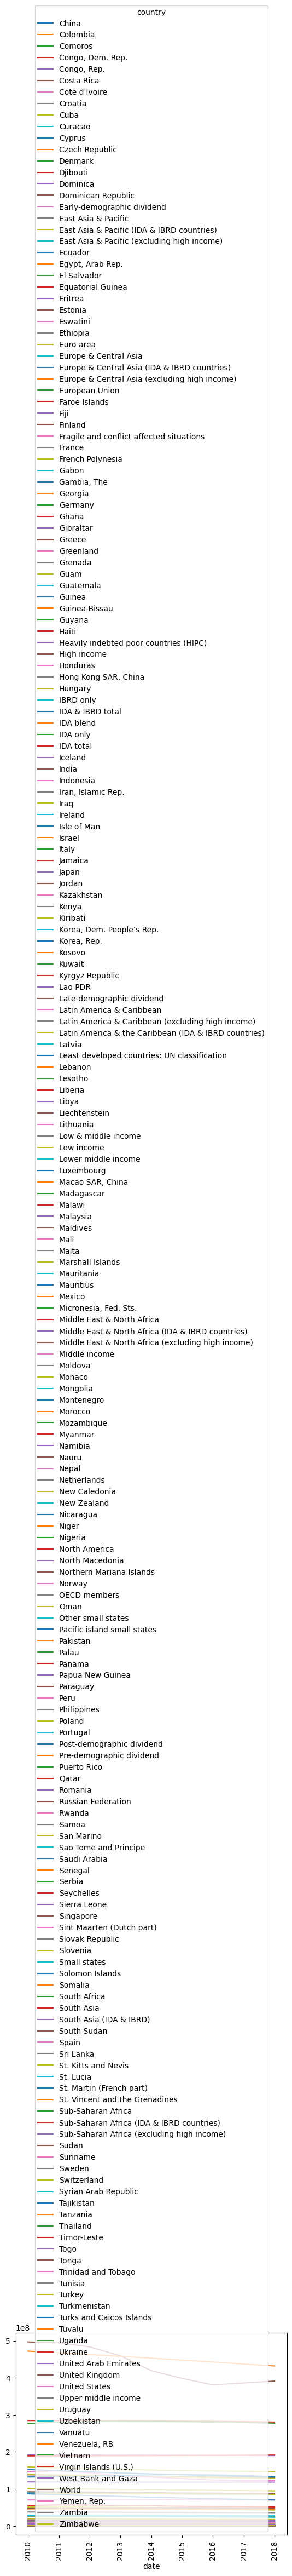

       country  date  gdp         pop  gdp_per_capita
0  Afghanistan  2010  NaN  29185507.0             NaN
1  Afghanistan  2011  NaN  30117413.0             NaN
2  Afghanistan  2012  NaN  31161376.0             NaN
3  Afghanistan  2012  NaN  31161376.0             NaN
4  Afghanistan  2013  NaN  32269589.0             NaN 

country        China       Colombia       Comoros  Congo, Dem. Rep.  \
date                                                                  
2010     4550.450211  300915.248316  1.973084e+07     210771.184756   
2011     5618.132175  298013.063021  1.925955e+07     203852.427692   
2012     6316.918327  295337.042152  1.879921e+07     197161.007255   
2013     7050.649044  292666.663613  1.835214e+07     190701.058105   
2014     7651.344675  289725.977714  1.791991e+07     184474.325104   

country   Congo, Rep.    Costa Rica  Cote d'Ivoire       Croatia  \
date                                                               
2010     3.184150e+06  2.972925e+06  662

In [19]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp,pop,on=['country','date'],fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop["gdp_per_capita"]=gdp_pop["gdp"] / gdp_pop["pop"]

# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita',index= 'date',columns='country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= 1991')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90) 
plt.show()

print(gdp_pop.head(),'\n')
print(gdp_pivot.head())